# Grade: /100 Mark(s)

# Assignment 02: Maximum Likelihood


### Maximum Likelihood

The exponential distribution https://en.wikipedia.org/wiki/Exponential_distribution is a continuous probability distribution often used to predict time when an event might ocurr, for instance Earthquake. 

If we know $y$ is influenced by feature $x$, then we can use the maximum likelihood principle to develop a regression model that estimates the mean of $Y$ given $X=x$.

In [20]:
# Packages for this assignment
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression
%matplotlib inline

### Question 1: /10 Marks

The negative log likelihood for a exponential random variable is

$$\ell(\lambda; \mathbf{y}) = -\sum_{i=1}^N\Bigg(\ln(\lambda) - \lambda y_i \Bigg)$$

Here, $\mathbf{y}=(y_i) \in \mathbb{R^N}$ is a vector  and $\lambda$ is a scalar value.

Define a function called `exponentialNegLogLikelihood` that takes a vector  $\mathbf{y}$ and a parameter $\lambda$ and returns the negative log likelihood.

Test your function by calling it with `lamb = 2` and `y = np.array([1, 4, 6, 0])`.

Test your function by calling it with `lamb = np.array([1, 0.5, 2, 5])` and  `y = np.array([1.5, 2.1, 3.4, 0])`.

Answer in markdown:


* Explain what the function is doing if $\mathbf{\lambda}=(\lambda_i)$ and  $\mathbf{y}=(y_i)$. This is when the arguments are vectors.

* What happens when you set an element of lamb to 0 or a negative number. Why?

In [21]:
def exponentialNegLogLikelihood(lamb, y):
    neg_log_lik = -np.sum(np.log(lamb)-lamb*y)
    return neg_log_lik

In [22]:
# Test the function
lamb = 2
y = np.array([1, 4, 6, 0])
exponentialNegLogLikelihood(lamb, y)

19.227411277760222

In [23]:
# What happens when you call the function with lamb=np.array([1,0.5,2,5]) and y=np.array([1.5,2.1,3.4,0])?
lamb=np.array([1,0.5,2,5])
y=np.array([1.5,2.1,3.4,0])
exponentialNegLogLikelihood(lamb, y)

7.740562087565899

In [24]:
# look what happens if $\lambda=0$.
lamb=0
y=np.array([1.5,2.1,3.4,0])
exponentialNegLogLikelihood(lamb, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


inf

In [25]:
# Look what happens if $\lambda$ is negative.
lamb=-2
y=np.array([1.5,2.1,3.4,0])
exponentialNegLogLikelihood(lamb, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


nan

**Written Answer:** 
1. When the arguments are vetors, the function will match each lambda into each y to calculate the sum. That is different y have different lambda matched. 

2. When λ is 0 or negative, there is no answer to the maximum likelihood function. If λ is 0, ln0 is undefined. But lnλ is approaching negative infinite when λ approches 0. Therefore the result of the function when λ=0 is inf. If λ is negative, ln of negative number is undefined in real numbers. So the result turns to nan. 

---

### Question 2: /15 Marks

Write a function called `exponentialRegressionNegLogLikelihood` that takes as arguments a vector $\mathbf{y}$ , a design matrix $\mathbf{X}$ of features, and a vector $\mathbf{\beta}$ of parameters. The function should return the negative log likelihood of this dataset, assuming that each element of  $\mathbf{y}$ is independent, and exponentially distributed with $\lambda=\exp(-\mathbf{X}\beta)$.

Test your function by calling it with 
* `b = np.array([1, 3])`
* `X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T`
* `y = np.array([0, 2.5, 10])`

In [26]:
def exponentialRegressionNegLogLikelihood(b, X, y):
    lamb = np.exp(-X@b)
    neg_log_lik = exponentialNegLogLikelihood(lamb, y)
    return neg_log_lik

In [27]:
# Test your function 
b = np.array([1, 3])
X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T
y = np.array([0, 2.5, 10])
exponentialRegressionNegLogLikelihood(b, X, y)

26.60556862451103

---
### Question 3: /10 Marks

a) In `exponentialRegressionNegLogLikelihood`, what problem can happen if we assume that $\lambda = \mathbf{X}\beta$?.


b) What property of the exponential distribution is guaranteed when we assume that $\lambda$ has the form of $\exp(-\mathbf{X}\beta)$?: 

No more than 2 lines for each answer.

**Written Answer:**

a)If we assume λ=Xβ, $\lambda$ will be so large. And for large number of x data, $λ$ will turn to nan.

b)memoryless property guaranteed when we assumed λ has the form of exp(-Xβ). That means every y are independent and the next y does not depend on the former y.

---
### Question 4: /5 Marks

Define a function called `Prediction` whose arguments are a vector of coefficents $\beta$ and a design matrix $\mathbf{X}$, and its outputs are predictions of the form $\widehat{\mathbf{y}} = \exp(\mathbf{X}\beta)$. 

Test your function by calling it with 
* `b = np.array([1, 3])`
* `X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T`

In [28]:
# Definition of the Prediction
def Prediction(b, X):
    yhat = np.exp(X@b)
    return yhat

In [29]:
# Test the function
b = np.array([1, 3])
X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T
Prediction(b,X)

array([ 2980.95798704, 66171.16016838,  1808.04241446])

---
### Question 5: /15 Marks

Define a function called `Model_fit` which accepts as its first argument a design matrix $\mathbf{X}$ and as its second argument a vector of $\mathbf{y}$. Its output should be the maximum likelihood estimates for the coefficients of exponential regression of $\mathbf{y}$ onto $\mathbf{X}$.

Test your function by calling it with 
* `X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T`
* `y = np.array([0, 2.5, 10])`

Write the estimated coefficients $b$.

In [30]:
# Define Model_fit
def Model_fit(X, y):
    # Instantiate a guess for the betas, beta_start, so that the optimizer has somewhere to start
    # Keep in mind what shape the beta_start should be. It shoud have the same number of elements as X as columns
    beta_start = [1,1]
    # Minimize the appropriate likelihood function
    mle = minimize(exponentialRegressionNegLogLikelihood, beta_start, args=(X,y),method="SLSQP",options={'disp': 1})
    # Extract the maximum likelihood estimates from the optimizer.
    betas = mle.x
    return betas

In [31]:
# Show the code to find estimated b
X = np.array([[1.4, 2.1, 3], [2.2, 3, 1.5]]).T
y = np.array([0, 2.5, 10])
Model_fit(X,y)



Optimization terminated successfully.    (Exit mode 0)
            Current function value: 5.515565083826111
            Iterations: 8
            Function evaluations: 35
            Gradient evaluations: 8


array([ 1.1304558 , -0.67612739])

### Question 6: /20 Mark(s)

Use the data `exponential_regression.csv` to fit a exponential regression using the functions that you already have created. In this data, $y$ is measured in time units. 

* What are the estimated coefficients?
* Plot a scatterplot of the data that includes the model prediction over $x \in [-2.14, 2.14]$. Do not forget to include a graph title.

In [32]:
# Loading in the data.
from google.colab import drive 
drive.mount('/content/gdrive')
df = pd.read_csv('gdrive/MyDrive/ds3000/asn2/exponential_regression.csv',sep=';')

# Create the design matrix
x = df.x.values
x = x.reshape(-1,1)
lx = np.asarray([1]*x.size).reshape(-1,1)
X = np.hstack((lx,x))
y = df.y.values

# Find the maximum likelihood estimates for the coefficients for this data
beta = Model_fit(X,y)
print("estimated coefficient:",beta)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 109.24158649315655
            Iterations: 13
            Function evaluations: 59
            Gradient evaluations: 13
estimated coefficient: [ 0.07120824 -1.7511909 ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in subtract
  


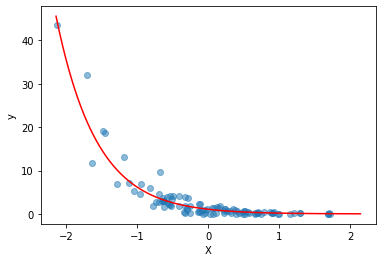

In [33]:
# Scatterplot the data. 
plt.scatter(x,y,alpha=0.5)
plt.xlabel("X")
plt.ylabel("y");
# Create the new data to graphic the prediction
newx = np.linspace(-2.14, 2.14, 1001)
newx = newx.reshape(-1,1)
lx = np.asarray([1]*newx.size).reshape(-1,1)
newX = np.hstack((lx,newx))
# Predictions on the new data
y_predicted = Prediction(beta, newX)

#Finally, plot the predictions on the same graph
plt.plot(newx,y_predicted,color='red')

### Question 7:  /20 Marks

Fit a linear regression (ordinary least squares) to the data, and obtain parameter estimates and and plot the predictions over the same range.


parameter estimates: [ 0.         -5.11409159]


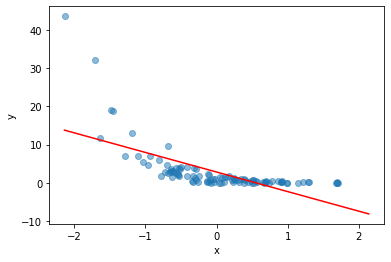

In [34]:
# fit the linear regression model
ols_fit = LinearRegression().fit(X,y)
coeff = ols_fit.coef_
print("parameter estimates:",coeff)
# Make predictions on the new data
y_predicted = ols_fit.predict(newX)

# Plot a scatter plot of the data and your model's predictions
plt.scatter(x,y,alpha=0.5)
plt.plot(newx,y_predicted,color='red')
plt.xlabel("x")
plt.ylabel("y");

### Question 8: /5 Mark(s)

Between this two models which one would you select? What is the major problem with predictions from linear regression? Remember that in this case $y$ is measured in time units.

**Written answer:** I would select the exponential model because the exponential fits the data better. Apparently the data fit exponential distribution with less residuals. Also another reason is that exponential distribution is the probability distribution of time between events. Linear regression does not show y in time change. 



### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.